In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import syllables
import re
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('../Data/train.csv')

In [4]:
excerpts = df['excerpt']

In [5]:
i = 0
excerptData = {}
for entry in excerpts:
    count = 0
    excerptData[i] = [len(entry.split()), len(re.split(r'\.!?', entry))]
    for word in entry.split():
        word = word.strip(',.')
        if (syllables.estimate(word) >= 3) and ((not word.endswith('ed')) or (not word.endswith('ing')) or (not word.endswith('es'))):
            count += 1
    excerptData[i].append(count)
    i += 1
        

In [6]:
def GunningFog(words, sentences, complexWords):
    
    return (.4*((words/sentences) + 100*(complexWords/words)))

In [7]:
for i in range(len(excerptData)):
    excerptData[i].append(GunningFog(*excerptData[i]))

In [8]:
excerptData = np.array(list(excerptData.values()))

In [9]:
targetValues = np.array(df['target'])

In [10]:
reg = LinearRegression().fit(excerptData[:, 3].reshape(-1,1), targetValues)

In [11]:
reg.coef_

array([-0.13470773])

Text(0, 0.5, 'Target Values')

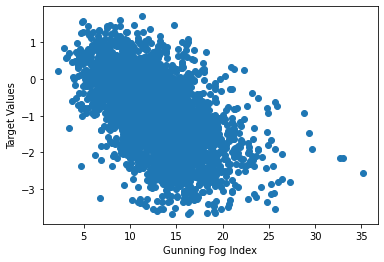

In [12]:
plt.scatter(excerptData[:, 3], targetValues)
plt.xlabel("Gunning Fog Index")
plt.ylabel("Target Values")

In [13]:
df

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845
...,...,...,...,...,...,...
2829,25ca8f498,https://sites.ehe.osu.edu/beyondpenguins/files...,CC BY-SA 3.0,When you think of dinosaurs and where they liv...,1.711390,0.646900
2830,2c26db523,https://en.wikibooks.org/wiki/Wikijunior:The_E...,CC BY-SA 3.0,So what is a solid? Solids are usually hard be...,0.189476,0.535648
2831,cd19e2350,https://en.wikibooks.org/wiki/Wikijunior:The_E...,CC BY-SA 3.0,The second state of matter we will discuss is ...,0.255209,0.483866
2832,15e2e9e7a,https://en.wikibooks.org/wiki/Geometry_for_Ele...,CC BY-SA 3.0,Solids are shapes that you can actually touch....,-0.215279,0.514128
